# TITLE
### Christin Wang, Manan Shah, Shreya Ladva, Samuel Griffin

In [41]:
library(readxl)
library(tidyverse)
library(haven)
library(dplyr)
library(scales)
library(stargazer)
library(car)
library(GGally)
library(ggplot2)
library(ggcorrplot)
library(estimatr)

In [33]:
url <- "https://raw.githubusercontent.com/Speculatorrr/ECON326/d0e554d0459664e17c4489ca8c08f9e1f0e2406c/Student%20Performance%20Survey%20-%20March%202025.xlsx"
temp_file <- tempfile(fileext = ".xlsx")
download.file(url, temp_file, mode = "wb")
df <- read_excel(temp_file)

In [34]:
colnames(df) <- c(
    "GPA_percent", "GPA_scale", "single_study", "all_study", "exam_prepare",
    "course_take", "course_preference", "AI_use", "AI_help", "review",
    "hw", "sport", "club", "volunteer", "friend",
    "family", "student", "tuition", "aid", "aid_coverage",
    "job", "work", "finance", "sleep", "media",
    "screen", "anxiety", "commute", "transport", "course_mode",
    "future_work","future_edu", "confidence", "career", "faculty", 
    "ethnicity", "year")

1. `GPA_percent`: What is your current cumulative GPA (on a percentage scale)? Example: 75%  
2. `GPA_scale`: What is your current GPA on a 4.0 scale (if known)? Example: 3.51  
3. `single_study`: How many hours per week do you study for this course? Example: 9  
4. `all_study`: How many total hours per week do you study across all your courses? Example: 21  
5. `exam_prepare`: How many hours do you spend preparing for exams (excluding regular coursework)? Example: 8  
6. `course_take`: How many courses do you take on average per term? Example: 4  
7. `course_preference`: Do you prefer courses that focus more on practical applications or theoretical concepts?  
8. `AI_use`: How many hours per week do you use ChatGPT or other LLM or AI tools for studying or assignments? Example: 12  
9. `AI_help`: How do you feel AI tools like ChatGPT impact your learning? (5 = Strongly helps, 1 = Strongly harms)  
10. `review`: How much time per week do you spend on reviewing lecture slides and course materials? Example: 6  
11. `hw`: How much time per week do you spend on assignments, problem sets, and practice exercises? Example: 5  
12. `sport`: How many hours per week do you spend on sports or fitness activities? Example: 4  
13. `club`: How many hours per week do you spend on student clubs or societies? Example: 5  
14. `volunteer`: How many hours per week do you spend on volunteering or community service? Example: 3  
15. `friend`: How many hours per week do you spend socializing with friends? Example: 6  
16. `family`: How many hours per week do you spend socializing with family (online and in-person together)? Example: 8  
17. `student`: Are you an international, domestic, or exchange student? If you are an exchange student, just choose "Exchange" below.  
18. `tuition`: What is your average tuition fee per course? Example: 3200  
19. `aid`: Do you receive any scholarships or financial aid?  
20. `aid_coverage`: If you receive scholarships or financial aid, what percentage of your tuition does it cover? Example: 50%. If you do not get a scholarship or financial aid, just enter "0".  
21. `job`: Do you currently have a job while studying?  
22. `work`: How many hours per week do you work? Example: 12. Put "0" if you are not working.  
23. `finance`: Do you feel that your financial situation affects your academic performance? (5 = Significantly affects, 1 = No impact at all)  
24. `sleep`: How many hours of sleep do you get on an average night? Example: 6  
25. `media`: How much time do you spend daily on social media (in minutes)? Example: 200  
26. `screen`: How much time do you spend daily on screens (computer, phone, TV) for non-academic purposes (in minutes)? Example: 120  
27. `anxiety`: How often do you feel depressed or anxious these days? (5 = Very frequently, 1 = Never)  
28. `commute`: How long is your commute to campus (one way, in minutes)? Example: 25. If you live on campus, just write the walk time on average in minutes to your classes.  
29. `transport`: What is your primary mode of transportation to campus?  
30. `course_mode`: Do you prefer taking online courses, in-person courses, or a hybrid of both?
30. `future_work`: How often do you think about your future employment or career prospects? (5 = Constantly, 1 = Never)  
31. `future_edu`: Do you plan to pursue further education (graduate school, professional certification, etc.)?  
32. `confidence`: How confident are you in securing a job related to your field of study after graduation? (5 = Very confident, 1 = Not confident at all)  
33. `career`: Which career path are you most likely to pursue after graduation? (Select the option that best matches your current career goal)  
34. `faculty`: Which faculty are you in? (Select the faculty that best matches your program of study). Faculty of Arts is very vast so please google or use AI.  
35. `ethnicity`: What is your ethnicity?  
36. `year`: Which year are you in at your undergraduate program at UBC? (1 = First Year, 5 = Fifth Year or beyond)

In [35]:
df$GPA_percent <- as.numeric(gsub("%", "", df$GPA_percent))
df$aid_coverage <- as.numeric(gsub("%", "", df$aid_coverage))

# Convert to factors
df[] <- lapply(df, function(x) if (is.character(x)) as.factor(x) else x)

# Convert to numeric
df[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)]  <- lapply(df[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)] , as.numeric)

df <- drop_na(df)
df <- filter(df, student=="Domestic (Canadian student)", tuition < 1000)
head(df)

Warning message:
"强制改变过程中产生了NA"
Warning message:
"强制改变过程中产生了NA"


GPA_percent,GPA_scale,single_study,all_study,exam_prepare,course_take,course_preference,AI_use,AI_help,review,⋯,commute,transport,course_mode,future_work,future_edu,confidence,career,faculty,ethnicity,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
63.0,10,25,18,36,7,More practical applications,9,5,17,⋯,18,Public transit,Online courses,5,Yes,5,"Finance, Banking, or Investment",Faculty of Arts,East Asian,1
82.0,80,14,23,14,12,More theoretical concepts,14,5,19,⋯,32,Public transit,Online courses,5,Yes,2,Consulting or Advisory Services,Faculty of Arts,East Asian,2
78.0,39,23,30,18,12,More practical applications,14,4,7,⋯,18,Public transit,In-person courses,4,Yes,4,"Finance, Banking, or Investment",Faculty of Arts,White,2
85.8,83,17,30,15,12,More practical applications,18,4,7,⋯,26,Walking,Hybrid (mix of both),5,Yes,4,Government or Public Policy,Faculty of Arts,White,3
81.0,48,28,17,18,7,More theoretical concepts,4,3,3,⋯,26,Walking,Online courses,4,Unsure,1,"Finance, Banking, or Investment",Faculty of Arts,East Asian,3
77.7,82,9,20,36,12,More practical applications,13,5,5,⋯,25,Public transit,In-person courses,5,Yes,4,Law or Legal Services,Faculty of Science,East Asian,2


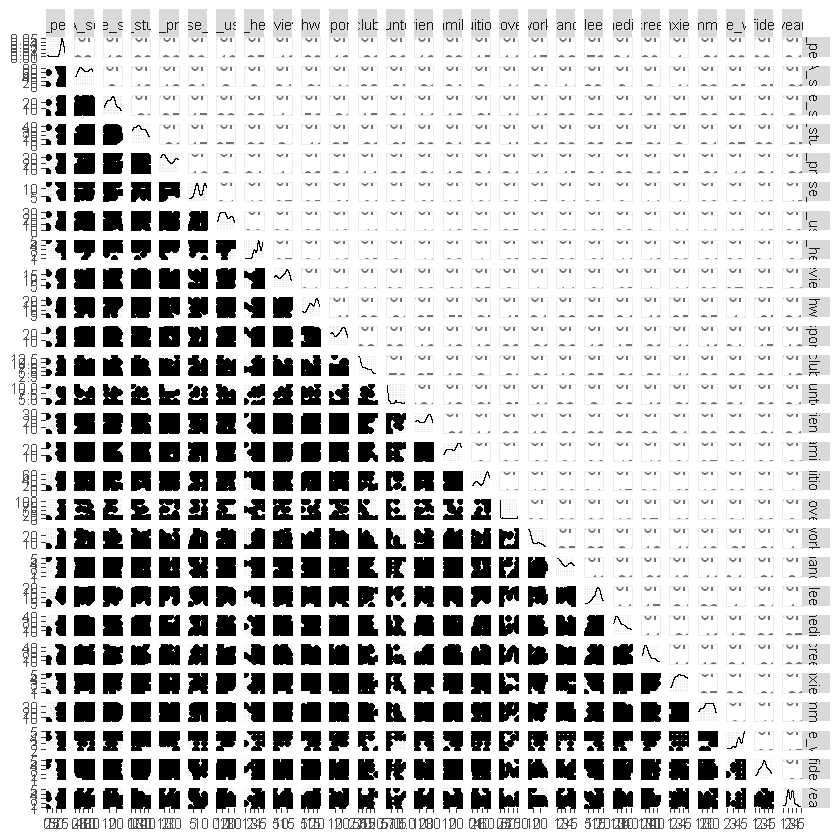

In [ ]:
#ggpairs(df[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)] )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

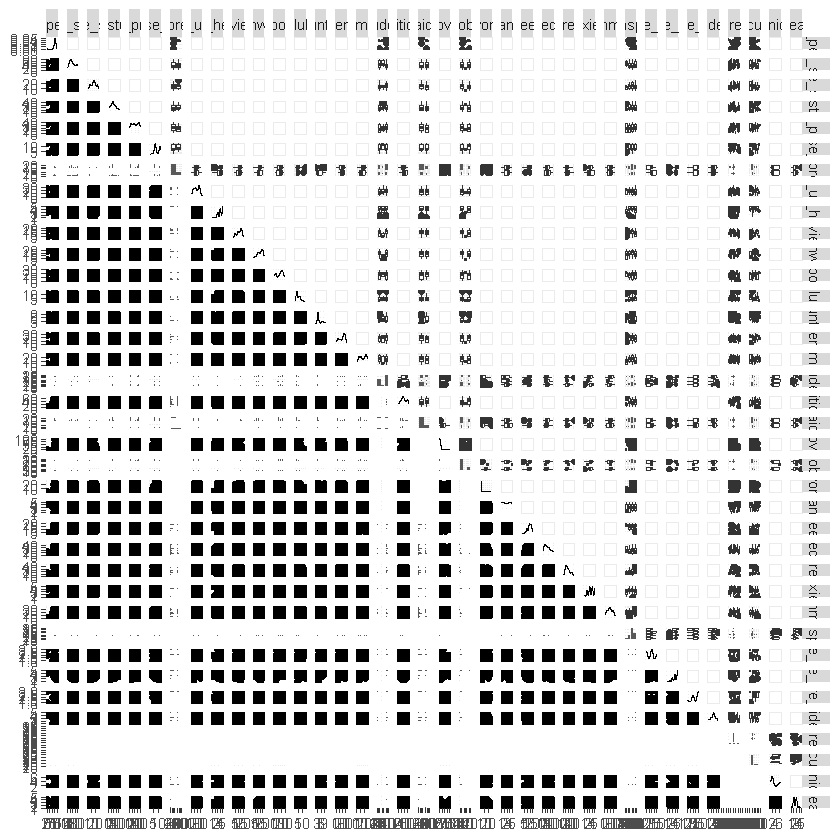

In [ ]:
#ggpairs(df)

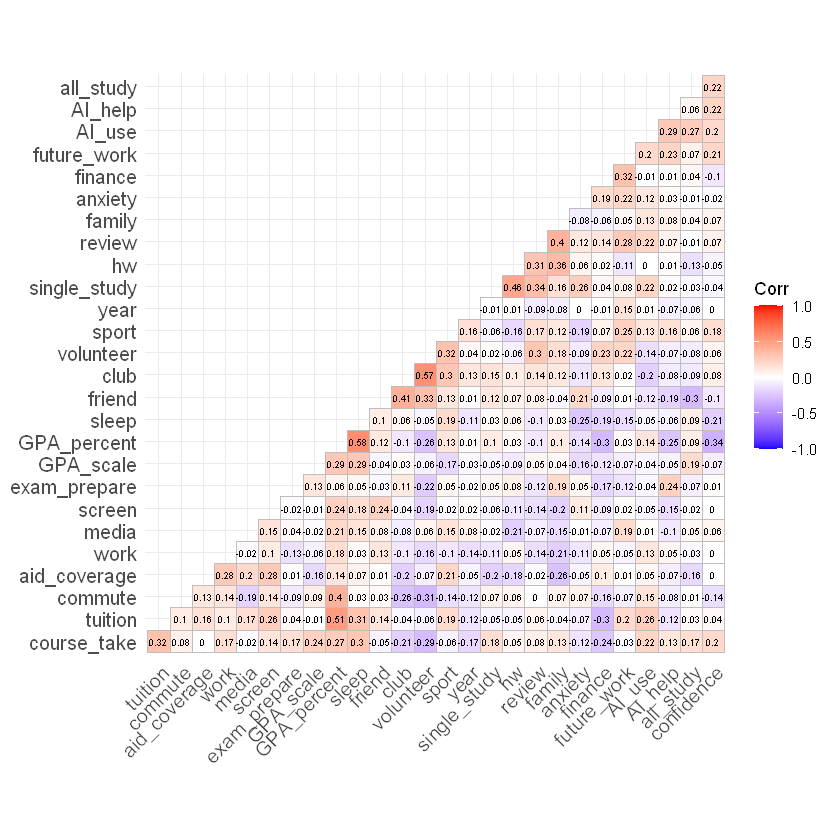

In [23]:
numeric_vars <- df[, c(1:6, 8:16, 18, 20, 22:28, 31, 33, 37)]

cor_matrix <- cor(numeric_vars, use = "pairwise.complete.obs")

cor_plot <- ggcorrplot(cor_matrix, hc.order = TRUE, type = "lower",
           lab = TRUE, lab_size = 2, colors = c("blue", "white", "red")) 


cor_plot

In [ ]:
#SLR
reg1 <- lm_robust(GPA_percent ~ tuition, data = df, se_type = "HC1")
summary(reg1)

将程序包安装入'C:/Users/chris/AppData/Local/R/win-library/4.3'
(因为'lib'没有被指定)



程序包'estimatr'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\chris\AppData\Local\Temp\RtmpUxfFTO\downloaded_packages里


Warning message:
"程辑包'estimatr'是用R版本4.3.3 来建造的"



Call:
lm_robust(formula = GPA_percent ~ tuition, data = df, se_type = "HC1")

Standard error type:  HC1 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|) CI Lower CI Upper DF
(Intercept)  55.0184     8.1895   6.718 7.051e-09   38.643  71.3943 61
tuition       0.4252     0.1496   2.841 6.099e-03    0.126   0.7244 61

Multiple R-squared:  0.2652 ,	Adjusted R-squared:  0.2532 
F-statistic: 8.073 on 1 and 61 DF,  p-value: 0.006099